<a href="https://colab.research.google.com/github/Ayon150/AI/blob/main/Augmentation_with_CIFAR_10(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Using device: cuda


100%|██████████| 170M/170M [00:14<00:00, 11.7MB/s]


✅ Model initialized.
Epoch [1/15] | Train Acc: 38.40% | Test Acc: 51.87% | Loss: 1.6689
Epoch [2/15] | Train Acc: 48.61% | Test Acc: 59.74% | Loss: 1.4158
Epoch [3/15] | Train Acc: 53.33% | Test Acc: 62.51% | Loss: 1.2927
Epoch [4/15] | Train Acc: 56.45% | Test Acc: 66.10% | Loss: 1.2202
Epoch [5/15] | Train Acc: 58.96% | Test Acc: 68.72% | Loss: 1.1586
Epoch [6/15] | Train Acc: 60.91% | Test Acc: 69.56% | Loss: 1.1094
Epoch [7/15] | Train Acc: 62.14% | Test Acc: 70.08% | Loss: 1.0750
Epoch [8/15] | Train Acc: 63.68% | Test Acc: 70.04% | Loss: 1.0319
Epoch [9/15] | Train Acc: 64.57% | Test Acc: 74.34% | Loss: 1.0057
Epoch [10/15] | Train Acc: 65.79% | Test Acc: 71.77% | Loss: 0.9821
Epoch [11/15] | Train Acc: 66.48% | Test Acc: 74.37% | Loss: 0.9568
Epoch [12/15] | Train Acc: 67.43% | Test Acc: 74.12% | Loss: 0.9353
Epoch [13/15] | Train Acc: 68.00% | Test Acc: 75.16% | Loss: 0.9196
Epoch [14/15] | Train Acc: 68.71% | Test Acc: 75.73% | Loss: 0.9011
Epoch [15/15] | Train Acc: 69.50% | 

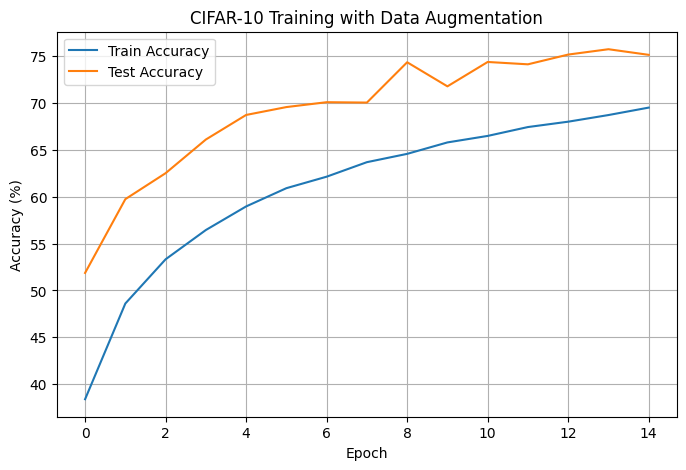

✅ Model saved as 'cifar10_augmented_cnn.pth'


In [1]:
# ===============================================
# 🧩 CIFAR-10 Training with Data Augmentation
# ===============================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1️⃣ Device Configuration
# --------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# --------------------------------------------------
# 2️⃣ Data Augmentation & Normalization
# --------------------------------------------------
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),           # Random crop
    transforms.RandomHorizontalFlip(),              # Flip horizontally
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomRotation(15),                  # Small rotation
    transforms.ToTensor(),                          # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))           # Normalize
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

# --------------------------------------------------
# 3️⃣ Load CIFAR-10 Dataset
# --------------------------------------------------
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=100, shuffle=False, num_workers=2)

# --------------------------------------------------
# 4️⃣ Define CNN Model
# --------------------------------------------------
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)  # 10 classes in CIFAR-10
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

model = SimpleCNN().to(device)
print("✅ Model initialized.")

# --------------------------------------------------
# 5️⃣ Loss Function and Optimizer
# --------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --------------------------------------------------
# 6️⃣ Training the Model
# --------------------------------------------------
num_epochs = 15
train_acc_list, test_acc_list = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_acc_list.append(train_acc)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_acc = 100 * correct / total
    test_acc_list.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Loss: {running_loss/len(train_loader):.4f}")

# --------------------------------------------------
# 7️⃣ Plot Accuracy Graph
# --------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.title('CIFAR-10 Training with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------------
# 8️⃣ Save Model
# --------------------------------------------------
torch.save(model.state_dict(), "cifar10_augmented_cnn.pth")
print("✅ Model saved as 'cifar10_augmented_cnn.pth'")
